# Plotting Notebook

Hi! Welcome :) This code was originally created by Marilena Lykiardopoulou and was refreshed and commented by Annabelle Czihaly. 
The goal of this script is to plot counts vs. frequency for different cleaning times.
Make a copy and try with your own data! Need a hand? Please forward your questions to aczihaly@triumf.ca

#### import packages

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from scipy.optimize import curve_fit

#### define tof_resonance which needs 1 input: a dataframe

In [32]:
def tof_res(df): 
    
    ToF = []
    counts = []
    sigma = []
    frequency = []
    
    for i in range(0, max(df['x_step_idx'])+1):
        
        df_i = df.loc[df['x_step_idx']==i]
        
        ToF.append(np.average(df_i['tof']))
        sigma.append(np.std(df_i['tof'])) #standard deviation of ToF
        counts.append(len(df_i['tof'])) 
        frequency.append(np.average([float(item.strip('[]')) for item in df_i['step_value_ppg'].tolist()])) 
        
    return ToF, sigma, counts, frequency

#### load in data and use function created above

In [33]:
df1 = pd.read_csv("run47984.csv") # cleaning Ca
df2 = pd.read_csv("run47987.csv") # cleaning Sc

ToF_df1, sigma_df1, counts_df1, frequency_df1 = tof_res(df1)
ToF_df2, sigma_df2, counts_df2, frequency_df2 = tof_res(df2)

#### make plots

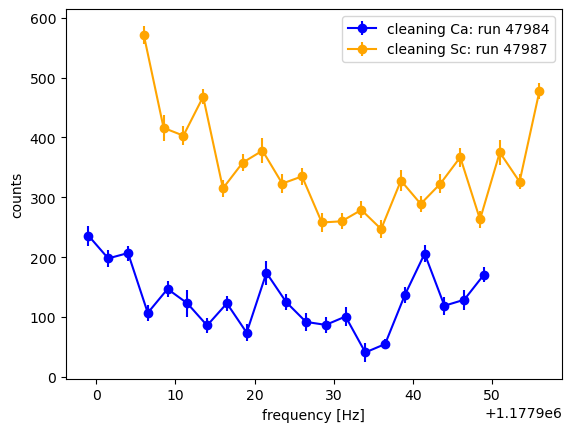

In [34]:
plt.errorbar(frequency_df1, counts_df1, sigma_df1, marker = 'o', color='blue', label='cleaning Ca: run 47984')
plt.errorbar(frequency_df2, counts_df2, sigma_df2, marker = 'o', color='orange', label='cleaning Sc: run 47987')

plt.xlabel('frequency [Hz]')
plt.ylabel('counts')
plt.legend()